# Color Space - HSV (Hue Saturation and Value) 

- Inaddition to RGB, color images can also be represented in HSV model.
- HSV represents each color in cylindrical coordinates rather than linear space like RGB
- HSV can be also called as HSB (Hue Saturation Brightness) or HSL (Hue Saturation Luminance)
- **Saturation** and **Value** can be normalized to *1* or another *scale factor* (eg. 10 or 100)
- HSV is more close to how human vision percieves colors
![HSV Model](../images/other/hsv.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
def rgb_to_hsv_converter(rgb, scaleFactor=1):
    r, g, b = rgb
    r, g, b = r/255, g/255, b/255   # normalizing rgb values
    cmax = max(r,g,b)
    cmin = min(r,g,b)
    diff = cmax - cmin
    if cmax == cmin: # when cmax - cmin is 0, h becomes inf, hence needs separate check for it
        h = 0
    elif cmax == r:
        h = ( 0 + 60*((g-b)/diff) ) % 360   # value should not exceed 360 hence aplying modulus
    elif cmax == g:
        h = ( 120 + 60*((b-r)/diff) ) % 360
    elif cmax == b:
        h = ( 240 + 60*((r-g)/diff) ) % 360

    if h < 0:
        h = h + 360
    if cmax == 0:
        s = 0
    else:
        s = (diff/cmax) * scaleFactor
    v = cmax * scaleFactor

    return h,s,v

In [3]:
rgb_to_hsv_converter(np.array([100,200,50]))

(100.0, 0.75, 0.7843137254901961)

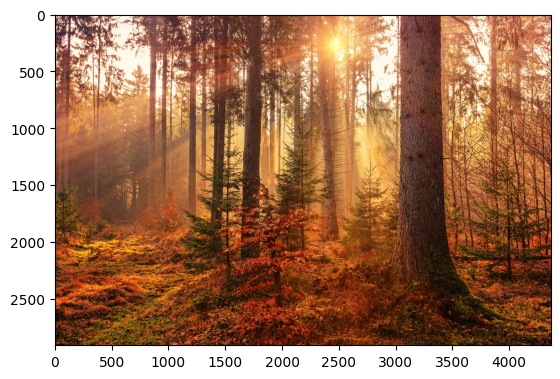

In [4]:
im = plt.imread('../images/color/johannes-plenio-RwHv7LgeC7s.jpg')
# or
# im = cv2.imread('../images/color/johannes-plenio-RwHv7LgeC7s.jpg')
# im = im2[:,:,::-1]    ## Converting openCV default BGR to RGB
plt.imshow(im)

In [5]:
im[0,0,:]   # rgb values of pixel at position (0,0)

array([74, 42, 53], dtype=uint8)

Red is 74, Green is 42 and Blue is 53

In [6]:
# HSV values of pixel at position (0,0)
rgb_to_hsv_converter(im[0,0,:])

(339.375, 0.4324324324324325, 0.2901960784313726)

In [7]:
# %time
hsv_img = np.apply_along_axis(func1d=rgb_to_hsv_converter,axis=2,arr=im)
# hsv_img = np.apply_along_axis(func1d=rgb_to_hsv_converter,axis=2,arr=im,scaleFactor=255)

#### Note: RGB to HSV converter function used above is taking more time to generate hsv image

In [8]:
print(f'Shape of RGB image: {im.shape}')
print(f'Shape of HSV image: {hsv_img.shape}')

Shape of RGB image: (2912, 4368, 3)
Shape of HSV image: (2912, 4368, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


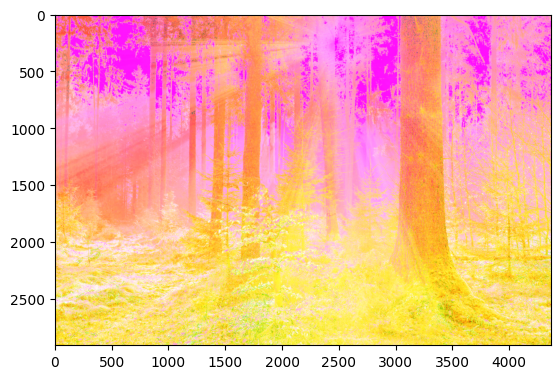

In [9]:
plt.imshow(hsv_img)

### Converting RGB image to HSV using OpenCV

In [14]:
# hsv_img_cv2 = cv2.cvtColor(im,cv2.COLOR_BGR2HSV)
hsv_img_cv2 = cv2.cvtColor(im,cv2.COLOR_RGB2HSV)

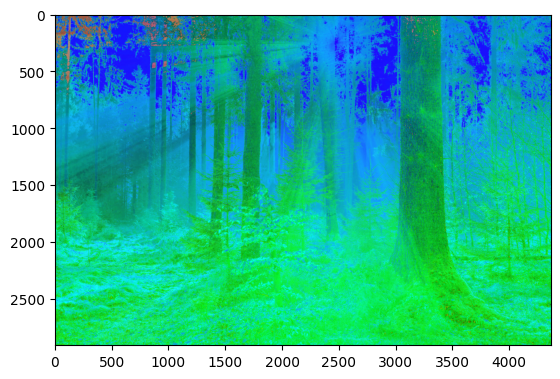

In [15]:
plt.imshow(hsv_img_cv2)

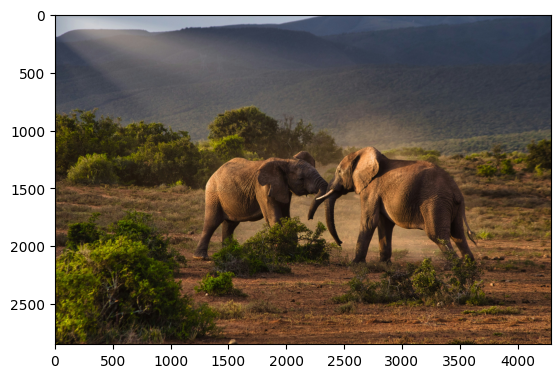

In [16]:
im1 = cv2.imread('../images/color/patrick-baum-evDuzZd8Kc0.jpg')
im1 = im1[:,:,::-1] # Converting opencv default BGR to RGB
plt.imshow(im1)

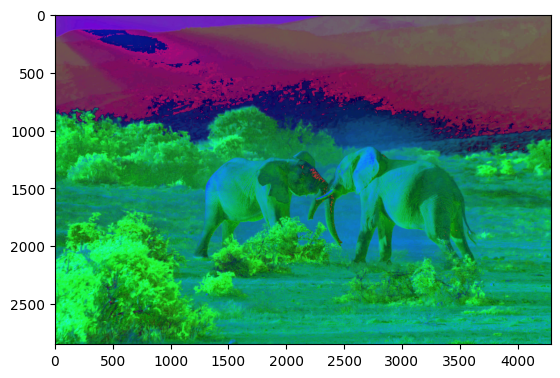

In [17]:
hsv_img = cv2.cvtColor(im1,cv2.COLOR_RGB2HSV)
plt.imshow(hsv_img)

In [18]:
rgb_img = cv2.cvtColor(hsv_img,cv2.COLOR_HSV2RGB)
rgb_img_full = cv2.cvtColor(hsv_img,cv2.COLOR_HSV2RGB_FULL)
bgr_img = cv2.cvtColor(hsv_img,cv2.COLOR_HSV2BGR)
bgr_img_full = cv2.cvtColor(hsv_img,cv2.COLOR_HSV2BGR_FULL)

[]

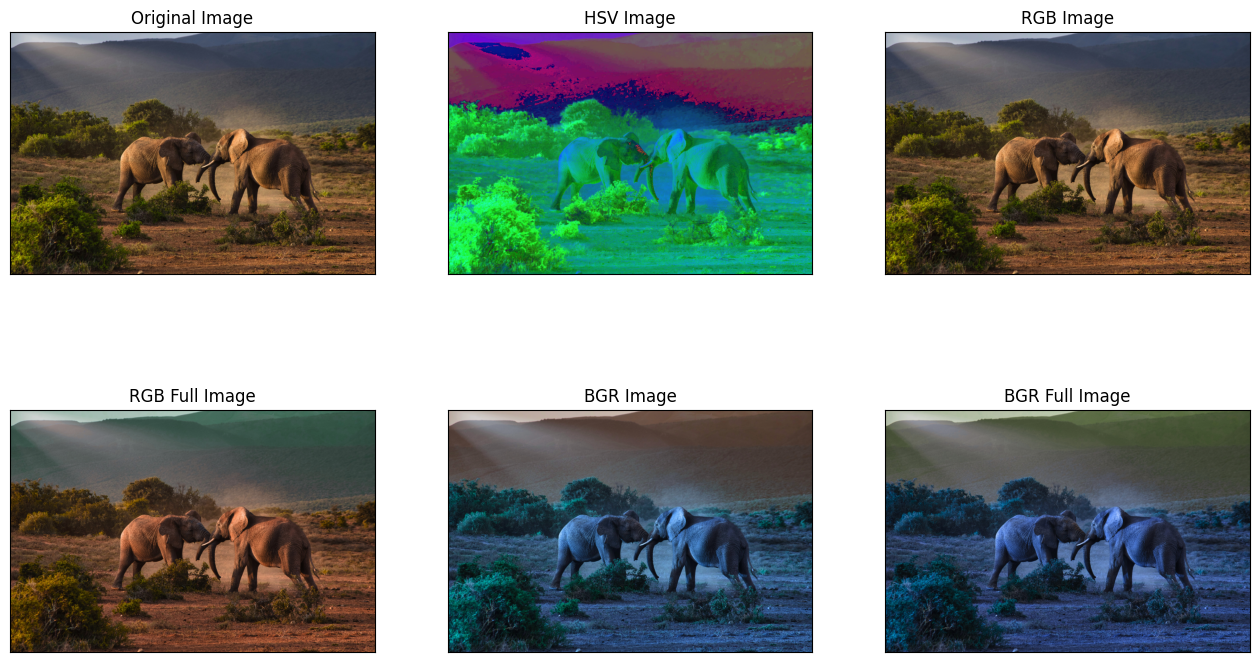

In [19]:
fig, axs = plt.subplots(nrows=2,ncols=3,figsize=(16,9))

axs[0,0].imshow(im1)
axs[0,0].set_title('Original Image')
axs[0,0].set_xticks([])
axs[0,0].set_yticks([])

axs[0,1].imshow(hsv_img)
axs[0,1].set_title('HSV Image')
axs[0,1].set_xticks([])
axs[0,1].set_yticks([])

axs[0,2].imshow(rgb_img)
axs[0,2].set_title('RGB Image')
axs[0,2].set_xticks([])
axs[0,2].set_yticks([])

axs[1,0].imshow(rgb_img_full)
axs[1,0].set_title('RGB Full Image')
axs[1,0].set_xticks([])
axs[1,0].set_yticks([])

axs[1,1].imshow(bgr_img)
axs[1,1].set_title('BGR Image')
axs[1,1].set_xticks([])
axs[1,1].set_yticks([])

axs[1,2].imshow(bgr_img_full)
axs[1,2].set_title('BGR Full Image')
axs[1,2].set_xticks([])
axs[1,2].set_yticks([])